<a href="https://colab.research.google.com/github/solenn-tl/DAN-cadastre/blob/master/arkindex/01_stats_arkindex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistiques des elements dans Arkindex

- Statistique des élements dans Arkindex (classes)
- Création de métadonnées concernant les types de registres d'états de sections
- Attributions de classes aux pages afin de gérer les imports dans Callico (avant annotation).

## Pré-requis et documentation

Documentation:
- [Doc de l'API Arkindex](https://doc.arkindex.org/overview/api/)
- [Doc du client Python de bas-niveau](https://pypi.org/project/arkindex-client/)
- [Doc de Arkindex CLI (haut niveau)](https://cli.arkindex.org/)

A installer :

In [1]:
!pip install arkindex-cli

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Login

In [4]:
!arkindex login --host arkindex.teklia.com --email solenn.tual@ign.fr
#IGN_677_@_gh56K

Loading API client… Done!
Password: 
Authentication successful
Slug to save profile as (default): prod
Set this profile as the default? (yes): yes


## Imports

In [5]:
import pandas as pd
import os
import json
from arkindex import ArkindexClient

In [6]:
cli = ArkindexClient('cdf9b285c9da6e82cddbf18aa070dc471a13facb')

In [7]:
#Retrieve corpus (project)
corpus = cli.request('ListCorpus')
for c in corpus:
    #print(c)
    if c["name"] == 'EPITA-IGN | Registre Napoléonien':
      corpus_id = c["id"]
      print(json.dumps(c, indent=2))

{
  "id": "59285827-bba3-42d4-99c7-e2436fe19f94",
  "name": "EPITA-IGN | Registre Napol\u00e9onien",
  "description": "Projet de Solenn",
  "public": false,
  "rights": [
    "read",
    "write",
    "admin"
  ],
  "types": [
    {
      "id": "a2718e04-c140-47c2-886d-42cf5757bf04",
      "slug": "page",
      "display_name": "Page",
      "folder": false,
      "color": "b828b3"
    },
    {
      "id": "fede5d95-e562-4f33-97e2-1fe18d20e2f1",
      "slug": "text_line",
      "display_name": "Text line",
      "folder": false,
      "color": "f4f740"
    },
    {
      "id": "8e98a93d-992c-4a32-a6da-2bd17abcb3a4",
      "slug": "text_zone",
      "display_name": "Text zone",
      "folder": false,
      "color": "0ac4be"
    },
    {
      "id": "151d522f-09cf-4a6e-9874-d39f31b4512f",
      "slug": "double_page",
      "display_name": "Double page",
      "folder": false,
      "color": "b8284c"
    },
    {
      "id": "064c8649-08ce-4c59-b60b-ffa8a7802376",
      "slug": "folder",
  

In [8]:
classes = cli.request('ListCorpusMLClasses',id=corpus_id)
classes

{'count': 9,
 'number': 1,
 'next': None,
 'previous': None,
 'results': [{'id': '00e945b7-07c1-4263-94f3-691c4fa9c30b',
   'name': 'ets_blank'},
  {'id': '707f562b-ca5d-496a-ad2a-e795eaf8121c', 'name': 'ets_couv'},
  {'id': 'e53efff5-de38-48c7-994b-f4fa28d669b5', 'name': 'ets_recap_inter'},
  {'id': 'd5d246d9-6c0d-487d-9e05-e1e67c7c2527', 'name': 'ets_resume'},
  {'id': 'fef896f5-f24f-4c11-b2e6-305756110fd4', 'name': 'ets_tab_line_s1_g1'},
  {'id': '51b9743b-3300-4a12-be69-e69395a2efbc', 'name': 'ets_tab_p1'},
  {'id': 'cf05fc31-0296-4d46-9ffc-02cf4d0e22d7',
   'name': 'ets_tab_p1_orientations_multiples'},
  {'id': '370d8f8a-e3ea-46d6-a64b-8459973e00d0',
   'name': 'ets_tab_p1_sample_1'},
  {'id': '1f835692-b148-4b0b-a2bf-c56e14ea290f', 'name': 'ets_tab_p2'}]}

In [86]:
ls_classes = []
for c in classes["results"]:
  ls_classes.append(c["name"])
print(ls_classes)

['ets_blank', 'ets_couv', 'ets_recap_inter', 'ets_resume', 'ets_tab_line_s1_g1', 'ets_tab_p1', 'ets_tab_p1_orientations_multiples', 'ets_tab_p1_sample_1', 'ets_tab_p2']


## 1. Statistiques sur les éléments de type page

In [81]:
#Retrieve all pages elements from ETATS_DE_SECTIONS folder
elements = []
for i in range(1,4):
  ls = cli.request('ListElementChildren',id="2c88832d-4e0d-4b37-b78f-ba235313bff6",type="page",recursive=True,folder=False,page_size=500,page=i,with_classes=True)
  if i == 1:
    elements = ls
  else:
    elements["results"] = elements["results"] + ls["results"]

In [82]:
#Nombre d'éléments de type page dans le dépôt Arkindex
len(elements["results"])

1018

In [84]:
elements["results"][1017]

{'id': '170785e5-5afa-44f7-be4a-69f2c6efc134',
 'type': 'page',
 'name': 'FRAD094_3P_000491_0116',
 'corpus': {'id': '59285827-bba3-42d4-99c7-e2436fe19f94',
  'name': 'EPITA-IGN | Registre Napoléonien',
  'public': False},
 'thumbnail_url': None,
 'zone': {'id': '170785e5-5afa-44f7-be4a-69f2c6efc134',
  'polygon': [[0, 0], [0, 4544], [3264, 4544], [3264, 0], [0, 0]],
  'image': {'id': 'b0a96955-6350-4bfc-abb8-5c4dcc072dac',
   'path': 'CADASTRE%2FETATS_DE_SECTION%2F%2FLEPLESSIS%2F3P_000491%2FFRAD094_3P_000491_0116.jpg',
   'width': 3264,
   'height': 4544,
   'url': 'https://iiif.geohistoricaldata.org/iiif/2/CADASTRE%2FETATS_DE_SECTION%2F%2FLEPLESSIS%2F3P_000491%2FFRAD094_3P_000491_0116.jpg',
   's3_url': None,
   'status': 'checked',
   'server': {'display_name': 'https://iiif.geohistoricaldata.org/iiif/2',
    'url': 'https://iiif.geohistoricaldata.org/iiif/2',
    'max_width': None,
    'max_height': None}},
  'url': 'https://iiif.geohistoricaldata.org/iiif/2/CADASTRE%2FETATS_DE_SEC

In [109]:
def treat_classifications(classifications_dict):
  classifications = []
  for c in classifications_dict:
    classifications.append(c["ml_class"]["name"])

  # Blank pages
  if 'ets_blank' in classifications:
    is_blank = True
  else:
    is_blank = False

  # Oriented text
  if 'ets_tab_p1_orientations_multiples' in classifications:
    is_oriented = True
  else:
    is_oriented = False

  #In sample 1
  if 'ets_tab_p1_sample_1' in classifications:
    is_sample_1 = True
  else:
    is_sample_1 = False

  # Couv
  classe = ""
  if 'ets_couv' in classifications:
    classe = "ets_couv"
  elif 'ets_tab_p1' in classifications:
    classe = "ets_tab_p1"
  elif 'ets_tab_p2' in classifications:
    classe = "ets_tab_p2"
  elif 'ets_recap_inter' in classifications:
    classe = "ets_recap_inter"
  elif 'ets_resume' in classifications:
    classe = "ets_resume"

  return classe, is_blank, is_oriented, is_sample_1


In [110]:
# Create a synthetic dataframe with "page" type elements details
arkindex_elems = []
columns = ["id","name","commune","cote_dossier","image","classe","is_blank","is_oriented","is_sample_1"]
for elem in elements["results"]:
  id = elem["id"]
  name = elem["name"]
  path = elem["zone"]["image"]["path"]
  splited_path = path.split("%2F")
  commune = splited_path[-3]
  cote_dossier = splited_path[-2]
  image = splited_path[-1][:-4]
  classifications = elem["classifications"]
  classe, is_blank, is_oriented, is_sample_1 = treat_classifications(classifications)
  row = [id,name,commune,cote_dossier,image,classe,is_blank,is_oriented,is_sample_1]
  arkindex_elems.append(row)

In [111]:
len(arkindex_elems)

1018

In [112]:
elementdsdict = pd.DataFrame(arkindex_elems, columns=columns)
elementdsdict = elementdsdict.sort_values(by=["commune","image"])
elementdsdict = elementdsdict.reset_index()
display(elementdsdict)

,index,id,name,commune,cote_dossier,image,classe,is_blank,is_oriented,is_sample_1
0,130,f11fae21-c23b-46d5-9324-26c52cc2f6e8,FRAD094_3P_000017_01_0004,ABLON,FRAD094_3P_000017_01,FRAD094_3P_000017_01_0004,ets_tab_p1,False,False,True
1,237,b25f5e23-1c13-4f0e-9933-2457dfd32695,FRAD094_3P_000017_01_0005,ABLON,FRAD094_3P_000017_01,FRAD094_3P_000017_01_0005,ets_tab_p1,False,False,True
2,280,0120dff9-f2fa-4e47-b756-c28cc643aae3,FRAD094_3P_000017_01_0006,ABLON,FRAD094_3P_000017_01,FRAD094_3P_000017_01_0006,ets_recap_inter,False,False,False
3,329,4a669607-caf4-43da-965b-885a5c0f0c2e,FRAD094_3P_000017_01_0007,ABLON,FRAD094_3P_000017_01,FRAD094_3P_000017_01_0007,ets_tab_p1,False,False,True
4,382,93fc3d05-a420-47cb-9767-ce2c17b997ea,FRAD094_3P_000017_01_0066,ABLON,FRAD094_3P_000017_01,FRAD094_3P_000017_01_0066,ets_tab_p2,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1013,256,d45a3cb5-3697-445f-9c30-ac2ec3d0c847,FRAD094_3P_000782_0375_P2,VITRY,3P_000782,FRAD094_3P_000782_0375,ets_tab_p1,False,False,True
1014,133,f415cc79-3fc9-4d58-afd0-9fc0d41e3536,FRAD094_3P_000782_0549_P1,VITRY,3P_000782,FRAD094_3P_000782_0549,ets_recap_inter,False,False,False
1015,244,bf02bff6-3624-440d-a0af-1eab68bd5344,FRAD094_3P_000782_0549_P2,VITRY,3P_000782,FRAD094_3P_000782_0549,ets_recap_inter,False,False,False
1016,18,21bab6e1-4743-4a3c-99ad-de8950a92724,FRAD094_3P_000782_0550_P1,VITRY,3P_000782,FRAD094_3P_000782_0550,ets_recap_inter,False,False,False


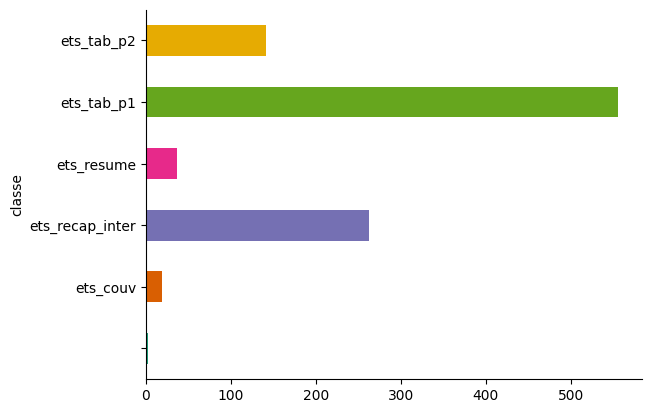

In [113]:
from matplotlib import pyplot as plt
import seaborn as sns
elementdsdict.groupby('classe').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

plt.gca().spines[['top', 'right',]].set_visible(False)

In [123]:
print(f"Total number of pages : {len(elementdsdict)}")
print(f"Number of pages of type ets_couv : {len(elementdsdict[elementdsdict['classe'] == 'ets_couv'])}")
print(f"Number of pages of type ets_tab_p1 : {len(elementdsdict[elementdsdict['classe'] == 'ets_tab_p1'])}")
print(f"Number of pages of type ets_tab_p2 : {len(elementdsdict[elementdsdict['classe'] == 'ets_tab_p2'])}")
print(f"Number of pages of type ets_recap_inter : {len(elementdsdict[elementdsdict['classe'] == 'ets_recap_inter'])}")
print(f"Number of pages of type ets_resume : {len(elementdsdict[elementdsdict['classe'] == 'ets_resume'])}")

print("They include:")
print(f"{len(elementdsdict[elementdsdict['is_blank'] == True])} blank pages.")
print(f"{len(elementdsdict[elementdsdict['is_oriented'] == True])} pages containing horizontal and vertical text.")
print(f"{len(elementdsdict[elementdsdict['is_sample_1'] == True])} pages in sample 1 (selected for annotation in Callico).")

Total number of pages : 1018
Number of pages of type ets_couv : 19
Number of pages of type ets_tab_p1 : 556
Number of pages of type ets_tab_p2 : 141
Number of pages of type ets_recap_inter : 263
Number of pages of type ets_resume : 37
They include:
19 blank pages.
67 pages containing horizontal and vertical text.
423 pages in sample 1 (selected for annotation in Callico).


1018 pages dont :
- 19 pages de couverture
- 556 pages de tableaux (tableau principal / tableau principal page 1/2 selon les types de registres)
- 141 pages de tableau principal page 2/2 (AV_1822)
- 263 tableaux récapitulatifs intermédiaire (liste des parcelles par nature de culture, liste des contenances et revenus par page...)
- 37 pages de résumés

## 2. Statistiques des tableaux à annoter par type d'états de section

In [124]:
df = pd.read_csv('/content/drive/MyDrive/THESE/Arkindex/samples_ets.csv')
display(df)

,Unnamed: 0,id,from,to_(excluded),range_len,is_small,Commune,Nom_dossier,Departement,Cote,Page_group_id,Date_infos,Date_doc,Titre_du_groupe_de_pages,Tag_groupe_doc,P_debut,P_fin,Num_couleur_gris,Num_simple_page_double_page,A_echantillonner
0,136,74,3,7,4,False,Ablon-sur-Seine,ABLON,Seine-et-Oise,FRAD094_3P_000017_01,1,1810,1865,Etat de section des propriétés bâties et non b...,AP_1822,1,7,COLOR,Simple,True
1,137,75,65,69,4,False,Ablon-sur-Seine,ABLON,Seine-et-Oise,FRAD094_3P_000017_01,2,1810,1810,Tableau indicatif des propriétaires des propri...,AV_1822_NB,8,93,COLOR,Simple,True
2,145,77,5,9,4,False,Alfortville,ALFORTVILLE,Seine,FRAD094_3P_000026_01,4,1886,1886,Etat de section des propriétés bâties et non b...,AP_1822,1,73,COLOR,Simple,True
3,140,77,11,15,4,False,Alfortville,ALFORTVILLE,Seine,FRAD094_3P_000026_01,4,1886,1886,Etat de section des propriétés bâties et non b...,AP_1822,1,73,COLOR,Simple,True
4,139,77,19,23,4,False,Alfortville,ALFORTVILLE,Seine,FRAD094_3P_000026_01,4,1886,1886,Etat de section des propriétés bâties et non b...,AP_1822,1,73,COLOR,Simple,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,122,68,636,640,4,False,Vitry-sur-Seine,VITRY,Seine,3P_000781,156,1813,1813,Etat de classement des propriétés non bâties,AV_1822_NB,419,749,GREY,Simple,True
251,123,68,716,720,4,False,Vitry-sur-Seine,VITRY,Seine,3P_000781,156,1813,1813,Etat de classement des propriétés non bâties,AV_1822_NB,419,749,GREY,Simple,True
252,126,71,251,253,2,True,Vitry-sur-Seine,VITRY,Seine,3P_000782,159,1841,1841,"Tableau indicatif des propriétés foncières, de...",RECTIFICATION_1835,220,438-1,GREY,Double,True
253,127,71,373,375,2,True,Vitry-sur-Seine,VITRY,Seine,3P_000782,159,1841,1841,"Tableau indicatif des propriétés foncières, de...",RECTIFICATION_1835,220,438-1,GREY,Double,True


In [125]:
import re

tags = []
nums = []
for i, row in elementdsdict.iterrows():
  index = row['image'].rfind('_')
  num = re.sub('^[0]+', '', row['image'][index+1:])
  num = int(num)
  for j, line in df.iterrows():
    if row['cote_dossier'] == line['Cote'] and (num > int(line['from']) and num <= int(line["to_(excluded)"])):
        tags.append(line['Tag_groupe_doc'])
        nums.append(num)

In [126]:
elementdsdict["tag"] = tags
elementdsdict["num"] = nums

In [127]:
display(elementdsdict)

,index,id,name,commune,cote_dossier,image,classe,is_blank,is_oriented,is_sample_1,tag,num
0,130,f11fae21-c23b-46d5-9324-26c52cc2f6e8,FRAD094_3P_000017_01_0004,ABLON,FRAD094_3P_000017_01,FRAD094_3P_000017_01_0004,ets_tab_p1,False,False,True,AP_1822,4
1,237,b25f5e23-1c13-4f0e-9933-2457dfd32695,FRAD094_3P_000017_01_0005,ABLON,FRAD094_3P_000017_01,FRAD094_3P_000017_01_0005,ets_tab_p1,False,False,True,AP_1822,5
2,280,0120dff9-f2fa-4e47-b756-c28cc643aae3,FRAD094_3P_000017_01_0006,ABLON,FRAD094_3P_000017_01,FRAD094_3P_000017_01_0006,ets_recap_inter,False,False,False,AP_1822,6
3,329,4a669607-caf4-43da-965b-885a5c0f0c2e,FRAD094_3P_000017_01_0007,ABLON,FRAD094_3P_000017_01,FRAD094_3P_000017_01_0007,ets_tab_p1,False,False,True,AP_1822,7
4,382,93fc3d05-a420-47cb-9767-ce2c17b997ea,FRAD094_3P_000017_01_0066,ABLON,FRAD094_3P_000017_01,FRAD094_3P_000017_01_0066,ets_tab_p2,False,False,False,AV_1822_NB,66
...,...,...,...,...,...,...,...,...,...,...,...,...
1013,256,d45a3cb5-3697-445f-9c30-ac2ec3d0c847,FRAD094_3P_000782_0375_P2,VITRY,3P_000782,FRAD094_3P_000782_0375,ets_tab_p1,False,False,True,RECTIFICATION_1835,375
1014,133,f415cc79-3fc9-4d58-afd0-9fc0d41e3536,FRAD094_3P_000782_0549_P1,VITRY,3P_000782,FRAD094_3P_000782_0549,ets_recap_inter,False,False,False,RECTIFICATION_1835,549
1015,244,bf02bff6-3624-440d-a0af-1eab68bd5344,FRAD094_3P_000782_0549_P2,VITRY,3P_000782,FRAD094_3P_000782_0549,ets_recap_inter,False,False,False,RECTIFICATION_1835,549
1016,18,21bab6e1-4743-4a3c-99ad-de8950a92724,FRAD094_3P_000782_0550_P1,VITRY,3P_000782,FRAD094_3P_000782_0550,ets_recap_inter,False,False,False,RECTIFICATION_1835,550


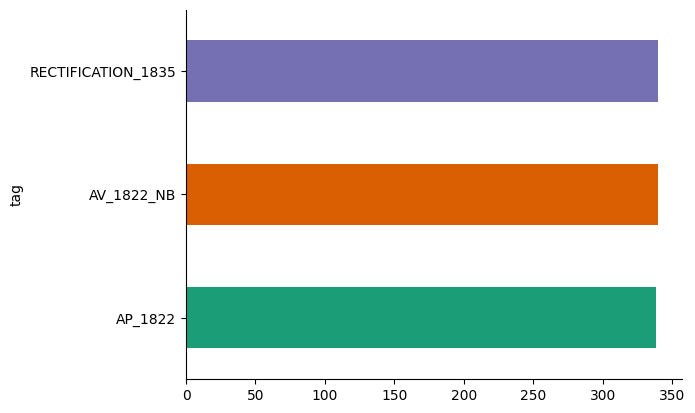

In [128]:
elementdsdict.groupby('tag').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [129]:
#Add metadata about document group
for i, row in elementdsdict.iterrows():
  id = row['id']
  b = {"type":"text","name":"tag","value":row['tag']}
  #e = cli.request('CreateMetaData',id=id,body=b)

In [130]:
main_tables = elementdsdict[elementdsdict['classe'] == 'ets_tab_p1']

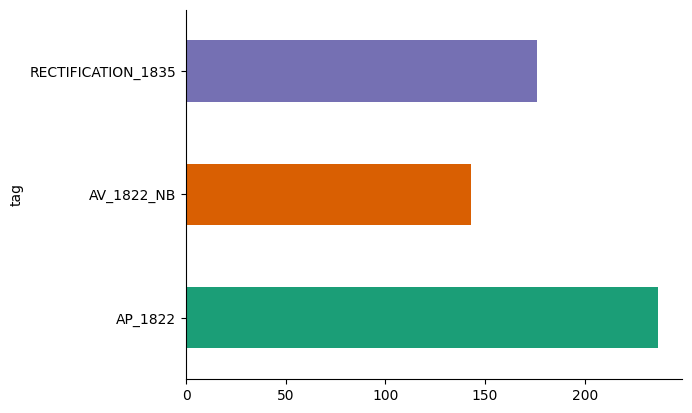

In [131]:
main_tables.groupby('tag').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## 3. Création d'un échantillon à transcrire

In [132]:
#Ecarte les pages blanches
main_tables = main_tables[main_tables['is_blank'] != 'true']

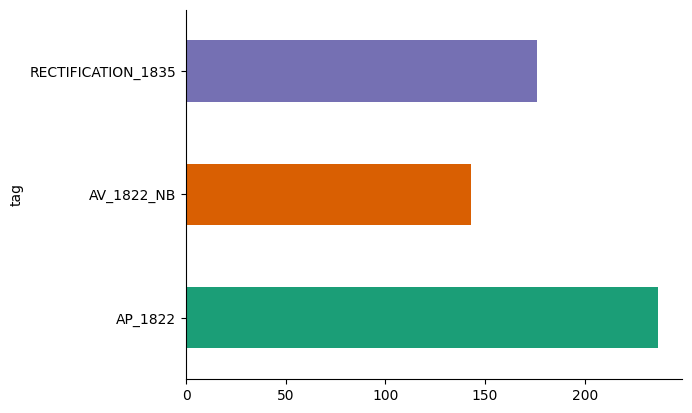

In [133]:
main_tables.groupby('tag').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [134]:
seed = 2023
main_tables.sample(frac=1, random_state=seed)

av_1822 = main_tables[main_tables['tag'] == 'AV_1822_NB'].sample(frac=1, random_state=seed)
print(f"AV_1822_NB : {len(av_1822)}")

ap_1822 = main_tables[main_tables['tag'] == 'AP_1822'].sample(frac=1, random_state=seed)
print(f"AP_1822 : {len(ap_1822)}")

rectification_1835 = main_tables[main_tables['tag'] == 'RECTIFICATION_1835'].sample(frac=1, random_state=seed)
print(f"RECTIFICATION_1835 : {len(rectification_1835)}")

length = [len(av_1822),len(ap_1822),len(rectification_1835)]
uniform_min = min(length)
print(f"min : {uniform_min}")

AV_1822_NB : 143
AP_1822 : 237
RECTIFICATION_1835 : 176
min : 143


In [135]:
transcription_sample_1 = pd.concat([av_1822,ap_1822[:uniform_min],rectification_1835[:uniform_min]], ignore_index=True)
display(transcription_sample_1)

,index,id,name,commune,cote_dossier,image,classe,is_blank,is_oriented,is_sample_1,tag,num
0,223,a12378c0-8395-4b16-ac40-e00789c20605,FRAD094_3P_000342_01_0084,LIMEIL,FRAD094_3P_000342_01,FRAD094_3P_000342_01_0084,ets_tab_p1,False,True,True,AV_1822_NB,84
1,25,33526574-34c4-465b-92b7-e7290dab78ce,FRAD094_3P_000441_0069_P1,ORMESSON,3P_000441,FRAD094_3P_000441_0069,ets_tab_p1,False,False,True,AV_1822_NB,69
2,575,7e224b37-a955-4258-95b9-dace7dca7d6e,FRAD094_3P_000379_01_0227,MANDRES,FRAD094_3P_000379_01,FRAD094_3P_000379_01_0227,ets_tab_p1,False,False,True,AV_1822_NB,227
3,974,14d66385-bdaf-4b45-b592-de79bff93ba8,FRAD094_3P_000491_0081,LEPLESSIS,3P_000491,FRAD094_3P_000491_0081,ets_tab_p1,False,False,True,AV_1822_NB,81
4,114,d42978aa-1f3b-4680-8b8a-38cd3eee0986,FRAD094_3P_000646_0012_P1,VILLECRESNES,3P_000646,FRAD094_3P_000646_0012,ets_tab_p1,False,True,True,AV_1822_NB,12
...,...,...,...,...,...,...,...,...,...,...,...,...
424,77,8f45f473-9f87-4f1c-a8a1-59a248f668b9,FRAD094_3P_000626_0290,THIAIS,3P_000626,FRAD094_3P_000626_0290,ets_tab_p1,False,False,True,RECTIFICATION_1835,290
425,256,d45a3cb5-3697-445f-9c30-ac2ec3d0c847,FRAD094_3P_000782_0375_P2,VITRY,3P_000782,FRAD094_3P_000782_0375,ets_tab_p1,False,False,True,RECTIFICATION_1835,375
426,412,6bedb9b8-a56e-4ef6-bb83-e94307030f0e,FRAD094_3P_000593_0045,SAINTMAURICE,3P_000593,FRAD094_3P_000593_0045,ets_tab_p1,False,False,True,RECTIFICATION_1835,45
427,303,7b470010-147e-47cb-8482-0764d6c7ba51,FRAD094_3P_000429_0118,ORLY,3P_000429,FRAD094_3P_000429_0118,ets_tab_p1,False,False,False,RECTIFICATION_1835,118


In [136]:
#Add a new classe for ets_tab_p1	to transcribe (first sample)
for i, row in transcription_sample_1.iterrows():
  id = row['id']
  b = {"element":id,"ml_class":"370d8f8a-e3ea-46d6-a64b-8459973e00d0"} #uuid of 'ets_tab_p1_sample_1'
  #e = cli.request('CreateClassification',body=b)

## 4. Add special class to table line of sample 1

In [137]:
transcription_sample_1 = transcription_sample_1.sort_values(by=['commune','cote_dossier','num'])
transcription_sample_1

,index,id,name,commune,cote_dossier,image,classe,is_blank,is_oriented,is_sample_1,tag,num
274,130,f11fae21-c23b-46d5-9324-26c52cc2f6e8,FRAD094_3P_000017_01_0004,ABLON,FRAD094_3P_000017_01,FRAD094_3P_000017_01_0004,ets_tab_p1,False,False,True,AP_1822,4
269,237,b25f5e23-1c13-4f0e-9933-2457dfd32695,FRAD094_3P_000017_01_0005,ABLON,FRAD094_3P_000017_01,FRAD094_3P_000017_01_0005,ets_tab_p1,False,False,True,AP_1822,5
162,329,4a669607-caf4-43da-965b-885a5c0f0c2e,FRAD094_3P_000017_01_0007,ABLON,FRAD094_3P_000017_01,FRAD094_3P_000017_01_0007,ets_tab_p1,False,False,True,AP_1822,7
47,420,a5400273-8704-444a-bcb8-74b3a21a1675,FRAD094_3P_000017_01_0067,ABLON,FRAD094_3P_000017_01,FRAD094_3P_000017_01_0067,ets_tab_p1,False,False,True,AV_1822_NB,67
93,479,7c98a117-9a3d-4ff4-b392-51c4c9f953a8,FRAD094_3P_000017_01_0069,ABLON,FRAD094_3P_000017_01,FRAD094_3P_000017_01_0069,ets_tab_p1,False,False,True,AV_1822_NB,69
...,...,...,...,...,...,...,...,...,...,...,...,...
375,260,d994894b-2802-4bcc-9bf3-dca5d90c5431,FRAD094_3P_000782_0253_P2,VITRY,3P_000782,FRAD094_3P_000782_0253,ets_tab_p1,False,False,True,RECTIFICATION_1835,253
380,26,341d05a9-b4e3-47de-8ea8-5044e7531386,FRAD094_3P_000782_0253_P1,VITRY,3P_000782,FRAD094_3P_000782_0253,ets_tab_p1,False,False,True,RECTIFICATION_1835,253
339,28,3771e5c4-8537-4ccb-83b4-e770b8e0299e,FRAD094_3P_000782_0374_P1,VITRY,3P_000782,FRAD094_3P_000782_0374,ets_tab_p1,False,False,True,RECTIFICATION_1835,374
374,205,8aff25e5-8cec-4baa-8cd9-90933cfd370e,FRAD094_3P_000782_0374_P2,VITRY,3P_000782,FRAD094_3P_000782_0374,ets_tab_p1,False,False,True,RECTIFICATION_1835,374


In [138]:
seed = 2023
sg1 = 49
sg2 = 47

av_1822 = transcription_sample_1[transcription_sample_1['tag'] == 'AV_1822_NB'].sample(frac=1, random_state=seed)
print(f"AV_1822_NB : {len(av_1822)}")
av_1822_g1 = av_1822[:sg1]
av_1822_g2 = av_1822[sg1:sg1+sg2]
av_1822_g3 = av_1822[sg1+sg2:]

ap_1822 = transcription_sample_1[transcription_sample_1['tag'] == 'AP_1822'].sample(frac=1, random_state=seed)
print(f"AP_1822 : {len(ap_1822)}")
ap_1822_g1 = ap_1822[:sg1]
ap_1822_g2 = ap_1822[sg1:sg1+sg2]
ap_1822_g3 = ap_1822[sg1+sg2:]

rectification_1835 =transcription_sample_1[transcription_sample_1['tag'] == 'RECTIFICATION_1835'].sample(frac=1, random_state=seed)
print(f"RECTIFICATION_1835 : {len(rectification_1835)}")
rectification_1835_g1 = rectification_1835[:sg1]
rectification_1835_g2 = rectification_1835[sg1:sg1+sg2]
rectification_1835_g3 = rectification_1835[sg1+sg2:]

g1 = pd.concat([av_1822_g1,ap_1822_g1,rectification_1835_g1], ignore_index=True)
g2 = pd.concat([av_1822_g2,ap_1822_g2,rectification_1835_g2], ignore_index=True)
g3 = pd.concat([av_1822_g3,ap_1822_g3,rectification_1835_g3], ignore_index=True)
print(f"Len group 1 : {len(g1)}")
print(f"Len group 2 : {len(g2)}")
print(f"Len group 3 : {len(g3)}")

AV_1822_NB : 143
AP_1822 : 143
RECTIFICATION_1835 : 143
Len group 1 : 147
Len group 2 : 141
Len group 3 : 141


In [ ]:
display(g1)

,index,id,name,image,commune,cote_dossier,type,classe,is_blank,tag,num
0,223,a12378c0-8395-4b16-ac40-e00789c20605,FRAD094_3P_000342_01_0084,FRAD094_3P_000342_01_0084,LIMEIL,FRAD094_3P_000342_01,page,ets_tab_p1,False,AV_1822_NB,84
1,25,33526574-34c4-465b-92b7-e7290dab78ce,FRAD094_3P_000441_0069_P1,FRAD094_3P_000441_0069,ORMESSON,3P_000441,page,ets_tab_p1,False,AV_1822_NB,69
2,575,7e224b37-a955-4258-95b9-dace7dca7d6e,FRAD094_3P_000379_01_0227,FRAD094_3P_000379_01_0227,MANDRES,FRAD094_3P_000379_01,page,ets_tab_p1,False,AV_1822_NB,227
3,974,14d66385-bdaf-4b45-b592-de79bff93ba8,FRAD094_3P_000491_0081,FRAD094_3P_000491_0081,LEPLESSIS,3P_000491,page,ets_tab_p1,False,AV_1822_NB,81
4,114,d42978aa-1f3b-4680-8b8a-38cd3eee0986,FRAD094_3P_000646_0012_P1,FRAD094_3P_000646_0012,VILLECRESNES,3P_000646,page,ets_tab_p1,False,AV_1822_NB,12
...,...,...,...,...,...,...,...,...,...,...,...
142,369,523cd395-962c-4224-be9e-61436e0109d3,FRAD094_3P_000394_01_0711,FRAD094_3P_000394_01_0711,NOGENT,FRAD094_3P_000394_01,page,ets_tab_p1,False,RECTIFICATION_1835,711
143,529,d4ecb57d-1863-4a0e-9d4e-4c6675c39404,FRAD094_3P_000319_01_0036,FRAD094_3P_000319_01_0036,JOINVILLE,FRAD094_3P_000319_01,page,ets_tab_p1,False,RECTIFICATION_1835,36
144,90,ae9e2396-809c-4437-8263-49e0a4b5f9ae,FRAD094_3P_000287_01_0159,FRAD094_3P_000287_01_0159,IVRY,FRAD094_3P_000287_01,page,ets_tab_p1,False,RECTIFICATION_1835,159
145,14,1a6d7d2e-2f65-4224-adb3-fc5ec7327bf7,FRAD094_3P_000048_01_0069,FRAD094_3P_000048_01_0069,ARCUEIL,FRAD094_3P_000048_01,page,ets_tab_p1,True,RECTIFICATION_1835,69


In [ ]:
#Add the same classe to pages of this group
for i, row in g1.iterrows():
  id = row['id']
  tablelines = cli.request('ListElementChildren',id=id,type="page",recursive=True,folder=False,page_size=500,page=1,with_classes=True)
  for line in tablelines["results"]:
    b = {"element":line["id"],"ml_class":"fef896f5-f24f-4c11-b2e6-305756110fd4"} #uuid of 'ets_tab_line_s1_g1'
    #e = cli.request('CreateClassification',body=b)

In [ ]:
for i, row in g1.iterrows():
  id = row['id']
  print(id)
  b = {"element":row['id'],"ml_class":"fef896f5-f24f-4c11-b2e6-305756110fd4"} #uuid of 'ets_tab_line_s1_g1'
  print(b)
  e = cli.request('CreateClassification',body=b)

a12378c0-8395-4b16-ac40-e00789c20605
{'element': 'a12378c0-8395-4b16-ac40-e00789c20605', 'ml_class': 'fef896f5-f24f-4c11-b2e6-305756110fd4'}
33526574-34c4-465b-92b7-e7290dab78ce
{'element': '33526574-34c4-465b-92b7-e7290dab78ce', 'ml_class': 'fef896f5-f24f-4c11-b2e6-305756110fd4'}
7e224b37-a955-4258-95b9-dace7dca7d6e
{'element': '7e224b37-a955-4258-95b9-dace7dca7d6e', 'ml_class': 'fef896f5-f24f-4c11-b2e6-305756110fd4'}
14d66385-bdaf-4b45-b592-de79bff93ba8
{'element': '14d66385-bdaf-4b45-b592-de79bff93ba8', 'ml_class': 'fef896f5-f24f-4c11-b2e6-305756110fd4'}
d42978aa-1f3b-4680-8b8a-38cd3eee0986
{'element': 'd42978aa-1f3b-4680-8b8a-38cd3eee0986', 'ml_class': 'fef896f5-f24f-4c11-b2e6-305756110fd4'}
95553353-8ff7-436c-a926-4fa7f7bf5bd6
{'element': '95553353-8ff7-436c-a926-4fa7f7bf5bd6', 'ml_class': 'fef896f5-f24f-4c11-b2e6-305756110fd4'}
d6b2524b-9510-4942-81a8-38b0d6bab6a1
{'element': 'd6b2524b-9510-4942-81a8-38b0d6bab6a1', 'ml_class': 'fef896f5-f24f-4c11-b2e6-305756110fd4'}
f55a5fa8-9fbe

Pages à écarter :
- FRAD094_3P_000491_0081